# Examples

In [1]:
import beautifulplots as bp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Barplot

Data:Product Category Sales by Store


,category,sales,store,units
0,groceries,900,Store-A,180.0
1,groceries,600,Store-B,120.0
2,groceries,500,Store-C,100.0
3,hardware,500,Store-A,50.0
4,hardware,300,Store-B,30.0
5,hardware,200,Store-C,20.0
6,hobbies,400,Store-A,20.0
7,hobbies,400,Store-B,20.0
8,hobbies,200,Store-C,10.0


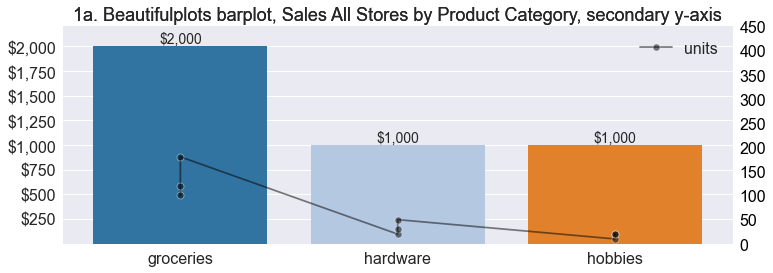

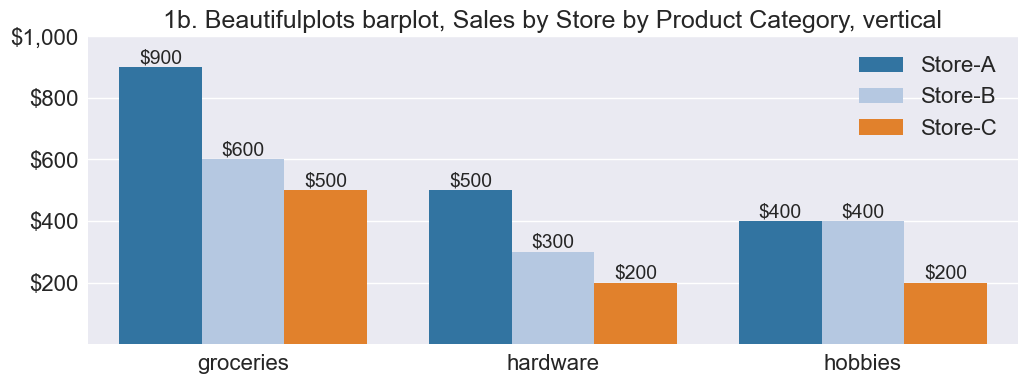

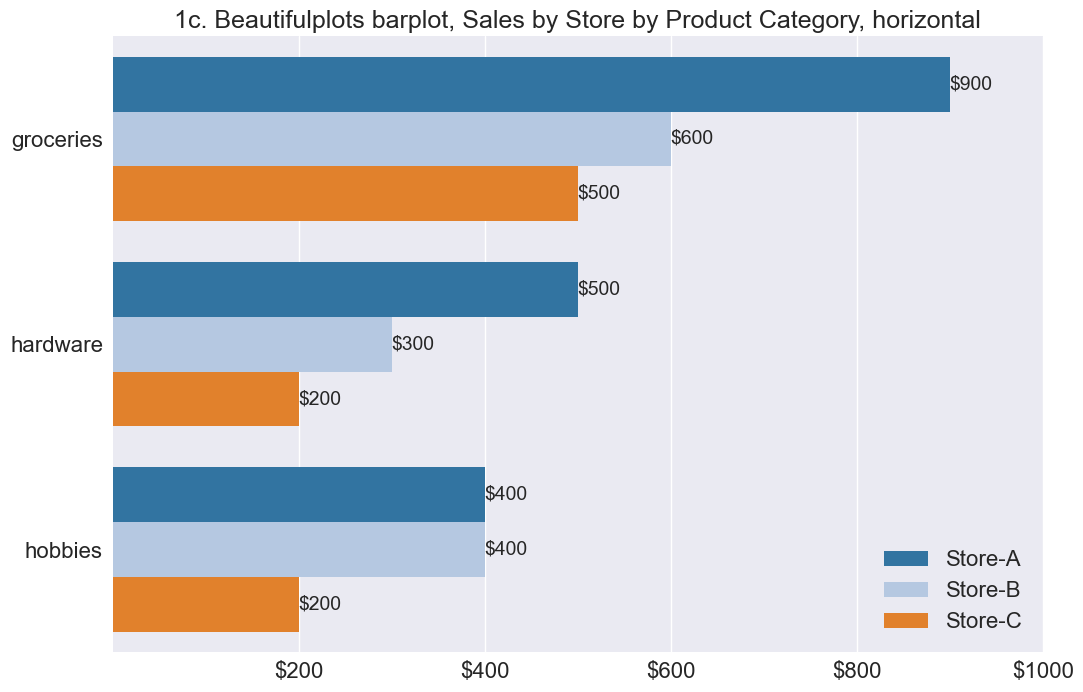

In [2]:


# reset plot defaults for these examples
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

# Data and Dataframe
print('Data:Product Category Sales by Store')
barplot_data = { 'category':['groceries','groceries','groceries', 'hardware','hardware','hardware','hobbies','hobbies','hobbies'] ,
                'sales':[ 900, 600,500, 500,300,200,400,400,200], 'store':['Store-A','Store-B','Store-C','Store-A','Store-B','Store-C','Store-A','Store-B','Store-C'] }

df = pd.DataFrame(barplot_data)
# unit sales by category ... assume some average sale price per category
def unit_sales(row):
    units = 0
    if row['category'] == 'groceries': units = row['sales']/5
    elif row['category'] == 'hardware': units = row['sales']/10
    elif row['category'] == 'hobbies': units = row['sales']/20
    return units
df['units']= df.apply(lambda row: unit_sales(row),axis=1)
display(df)



# Plots

# Example 1a
bp.barplot(df,'category','sales', palette='tab20', 
                   title='1a. Beautifulplots barplot, Sales All Stores by Product Category, secondary y-axis', figsize=(12,4),
                   bardatalabels=True, bardataformat=",.0f", barcurrency="$", ylims = (0.1,2200), 
                   y2='units',ylims2=(0,450), color2='black',marker2="o", y2axisformat=".0f")

# Example 1b
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1b. Beautifulplots barplot, Sales by Store by Product Category, vertical', figsize=(12,4),
                   bardatalabels=True, barcurrency="$", bardataformat=",.0f",
                   ylims = (0.1,1000))

# Example 1c
bp.barplot(df,'category','sales',hue='store', palette='tab20', 
                   title='1c. Beautifulplots barplot, Sales by Store by Product Category, horizontal', figsize=(12,8), 
                   bardatalabels=True, bardataformat=".0f", barcurrency="$", barorientation='h',
                   xlims = (0.1,1000), legendloc="lower right")







## Lineplot, Stock Market S&P 500

,Close,High,Low,Open,Volume,Adj Close
Date,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000.0,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000.0,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000.0,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000.0,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000.0,NaN


Pandas lineplot


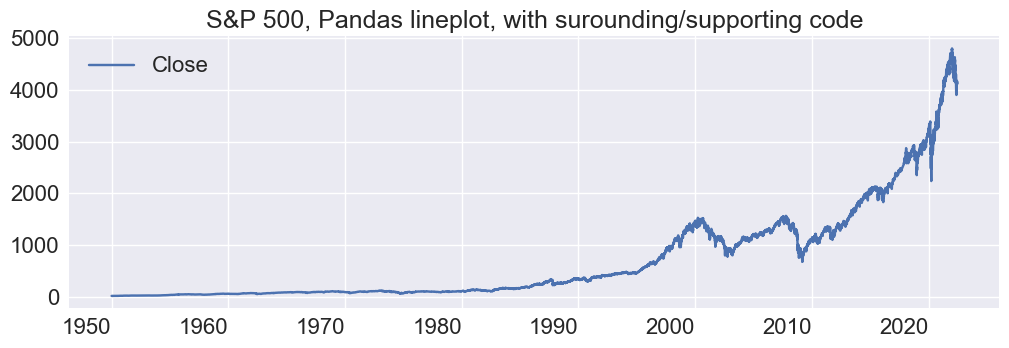

,Date,Close,High,Low,Open,Volume,Adj Close
0,1950-01-03,16.660000,16.660000,16.660000,16.660000,1.260000e+06,NaN
1,1950-01-04,16.850000,16.850000,16.850000,16.850000,1.890000e+06,NaN
2,1950-01-05,16.930000,16.930000,16.930000,16.930000,2.550000e+06,NaN
3,1950-01-06,16.980000,16.980000,16.980000,16.980000,2.010000e+06,NaN
4,1950-01-09,17.080000,17.080000,17.080000,17.080000,2.520000e+06,NaN
...,...,...,...,...,...,...,...
18158,2022-06-02,4176.819824,4177.509766,4074.370117,4095.409912,3.604930e+09,4176.819824
18159,2022-06-03,4108.540039,4142.669922,4098.669922,4137.569824,3.107080e+09,4108.540039
18160,2022-06-06,4121.430176,4168.779785,4109.180176,4134.720215,3.852050e+09,4121.430176
18161,2022-06-07,4160.680176,4164.859863,4080.189941,4096.470215,3.476470e+09,4160.680176


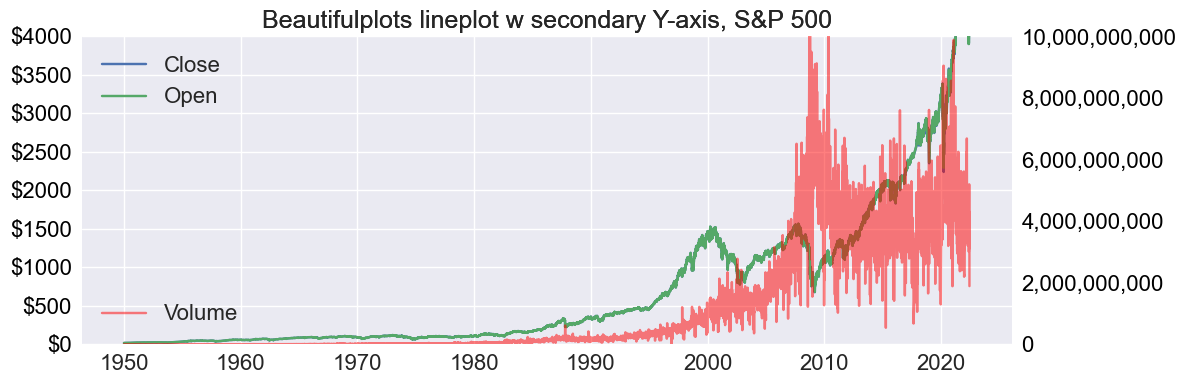

In [3]:

# reset plot defaults for these examples
import matplotlib as mpl
import datetime as dt
mpl.rcParams.update(mpl.rcParamsDefault) # reset plot/figure parameters

# Data
sp500_file =  '../data/GSPC_1950-1-3_to_2022-6-8.csv'
df_sp500 = pd.read_csv(sp500_file,index_col=0,parse_dates=True)
display(df_sp500.head())

# Pandas Plot ... use beutifulplots plot_defualts and set_axisparams for improving pandas graph 
print('Pandas lineplot')
plt.style.use('seaborn')
fig,ax = plt.subplots(nrows=1,ncols=1,figsize=(12,4))
plot_options = bp.plot_defaults()
plot_options['title']="S&P 500, Pandas lineplot, with surounding/supporting code"
g=df_sp500.plot(y='Close',ax=ax)  # note, it handles date index well
bp.set_axisparams(plot_options,ax,g)
plt.show()

# reset index ...  Seaborn and thus beautifulpltos requires x-axis to be a column 
df = df_sp500.reset_index() 
display(df)


# bp lineplot
bp.lineplot(df,x='Date' , y=['Close','Open'], y2='Volume',yaxisformat=".0f",ycurrency="$", y2axisformat=",.0f",
             ylims=(0,4000), ylims2=(0,10*1e9), legend_loc2 = "lower left", color2='red',
             figsize=[12,4],yaxis_currency=True, legend=True,
             ytick_format=".0f", title="Beautifulplots lineplot w secondary Y-axis, S&P 500")



# help - plot_defaults, barplot, lineplot

## help plot_defaults

In [4]:
help(bp.plot_defaults)

Help on function plot_defaults in module beautifulplots.beautifulplots:

plot_defaults()
    Dictionary of plot parameters. Each parameter coresponds and corresponding value. 
    See also get_plot_options for extracting plot options from **kwargs. 
    
    **Axis - x, y, and plot area parameters**
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar values and columns.
    
        title (String): corresponds to the axis title. default = ''
            
        titlefontsize: font size of the axis title, default = 18
            
        legend_loc(String): Matplotlib legend location, for example, upper right , default = "best".
        
        legend_loc2 (String): Secondary axis legend location, for example, upper right , default = best.
         
        xlims: (xmin, xmax), minimum and maximum x-values of the axis. default = None, in which case the min and max are set automatically by matplotlib.
        
        ylims: (ymin,ymax), m

## help barplot

In [5]:
help(bp.barplot)

Help on function barplot in module beautifulplots.barplot:

barplot(df, bar_columns, bar_values, barcurrency=None, barorientation='v', bardataformat='1.2f', y2=None, y2axisformat='1.2f', y2currency=None, estimator=<built-in function sum>, estimator2=None, ax=None, bardatalabels=False, test_mode=False, bardatafontsize=14, **kwargs)
    Bar plot function designed for ease of use and aesthetics. 
    The underlying barplot is ased on the Seaborn with additions, such as secondary axis, data labels,
    and improved default parameters. Refer to beautifulplots plot_defaults for a complete list of options.
    
    Args:
        df (DataFrame): The input DataFrame containing colums corresponding to bar_plot values ("bar_values") and column names (see examples in documentation)
            
        bar_columns: Datafrae columns corresponding to bar column names
            
        bar_values: Dataframe column corresponding to bar column values
            
        ax (axis): matplotlib axis (

## help lineplot

In [6]:
help(bp.lineplot)

Help on function lineplot in module beautifulplots.lineplot:

lineplot(df, x, y, yaxisformat='1.2f', ycurrency=None, y2=None, y2axisformat='1.2f', y2currency=None, ax=None, test_mode=False, estimator=None, estimator2=None, **kwargs)
    Lineplot function designed for ease of use and aesthetics. Based on the
    Seaborn lineplot function with improvements, such as secondary axis, ease of use, and 
    improved default parameters. Refer to beautiful plot_defauts for full list of options.
    
    Args:
        df (Dataframe): The input DataFrame containing colums corresponding to x and y     
            
        x: Dataframe column corresponding to the lineplot x-axis
            aldfsd;lfj
        
        y: Dolumn or list of columns corresponding to the lineplot y-axis
            
        y2: Column or list of columns correspondng to the secondary axis, default = None 
    
    Returns:
        returns None if processing completes succesfully (without errors).

